In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as mg

In [2]:
df1 = pd.read_json('data.json')

In [3]:
df1

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385,80,1,195,NaN
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052,50,1,360,5.0
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717,30,0,407,3.0
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606,30,0,544,4.0
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346,30,1,170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI9995,F,Si,76,No,Servicios,+20annos,Alto,2,1948,Generacion X,33389,Toledo,1424,30,1,106,NaN
10802,CLI9996,F,No,44,Si,Funcionario,+20annos,Bajo,1,1980,Generacion X,76067,Cordoba,1514,50,0,257,NaN
10803,CLI9997,M,Si,47,Si,Ejecutivo,+20annos,Alto,3,1977,Generacion X,61300,Lugo,1385,80,1,347,5.0
10804,CLI9998,M,Si,40,Si,Artista,10-20annos,Alto,3,1984,Millennials,106015,Cuenca,1974,30,0,582,1.0


In [4]:
import pandas as pd
df1 = pd.read_json('data.json')
# Supongamos que ya tienes el DataFrame cargado en df
# Ejemplo: df = pd.read_csv('df(2).csv')

# 1. Convertir variables binarias
binary_map = {'Si': 1, 'No': 0}
gender_map = {'F': 1, 'M': 0}  # Por ejemplo, F=1, M=0

df1['Genero'] = df1['Genero'].map(gender_map)
df1['Casado'] = df1['Casado'].fillna('No').map(binary_map)
df1['Graduado'] = df1['Graduado'].fillna('No').map(binary_map)
df1['Abandono'] = df1['Abandono'].astype(int)

# 2. Convertir variable ordinal "Gastoscore"
gastoscore_map = {'Bajo': 0, 'Medio': 1, 'Alto': 2}
df1['Gastoscore'] = df1['Gastoscore'].map(gastoscore_map)

# 3. Convertir variable ordinal "Experiencia_laboral"
exp_map = {'<10annos': 0, '10-20annos': 1, '+20annos': 2}
df1['Experiencia_laboral'] = df1['Experiencia_laboral'].map(exp_map)

# 4. Procesar "Campanna_anno": rellenar NaN, redondear y convertir a entero.
df1['Campanna_anno'] = df1['Campanna_anno'].fillna(0)
df1['Campanna_anno'] = df1['Campanna_anno'].astype(float).round().astype(int)

# 5. Codificación por etiqueta (label encoding) para "Profesion", "Generacion" y "Provincia"
# Se asigna un entero a cada categoría de forma arbitraria.
for col in ['Profesion', 'Generacion', 'Provincia']:
    if col in df1.columns:
        df1[col] = pd.factorize(df1[col])[0]

# 6. Asegurarse de que las columnas numéricas están en formato numérico
numeric_cols = [
    "Edad", "Family_Size", "anno_nacimiento", 
    "Ingresos_anuales_brutos", "Digital_encuesta",
    "Gasto_medio_mensual_cuota", "Dias_cliente"
]
for col in numeric_cols:
    if col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

# 7. Si alguna columna quedó en formato booleano, convertirla a entero.
for col in df1.columns:
    if df1[col].dtype == bool:
        df1[col] = df1[col].astype(int)

# Opcional: eliminar la columna "ID" si no se requiere para el clustering
if 'ID' in df1.columns:
    df1.drop(columns=['ID'], inplace=True)

# Verificar resultados
print(df1.head())
print(df1.dtypes)

   Genero  Casado  Edad  Graduado  Profesion  Experiencia_laboral  Gastoscore  \
0       1       1    67         1          0                    2           0   
1       0       1    64         1          1                    2           1   
2       0       1    65         1          2                    2           1   
3       0       0    33         0          3                    1           0   
4       0       1    52         0          4                    2           1   

   Family_Size  anno_nacimiento  Generacion  Ingresos_anuales_brutos  \
0            3             1957           0                    93442   
1            2             1960           0                    99774   
2            3             1959           0                    36756   
3            4             1991           1                    24616   
4            2             1972           0                    29834   

   Provincia  Digital_encuesta  Gasto_medio_mensual_cuota  Abandono  \
0        

PC1: 27.32%
PC2: 10.27%


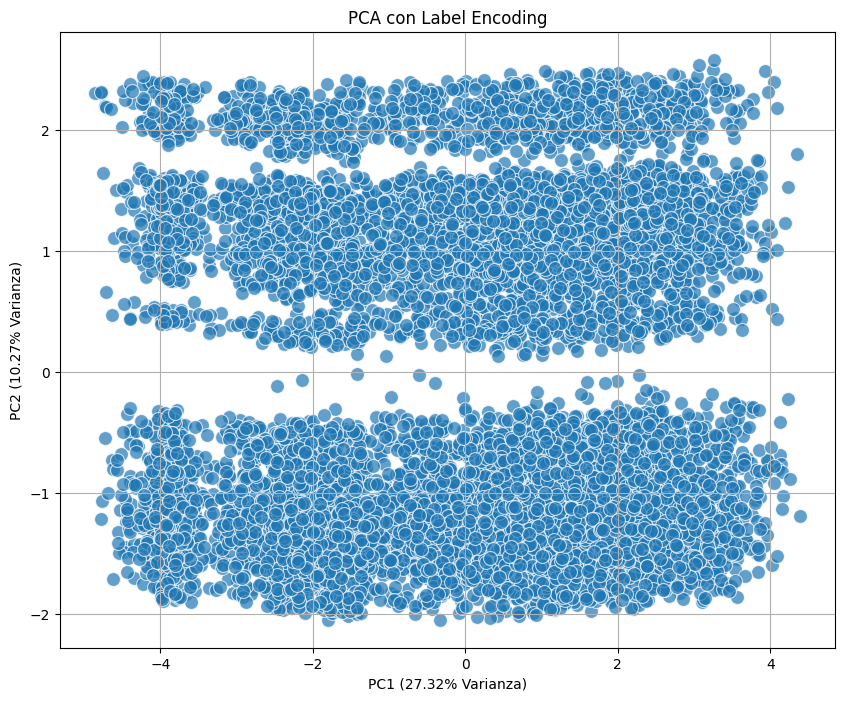

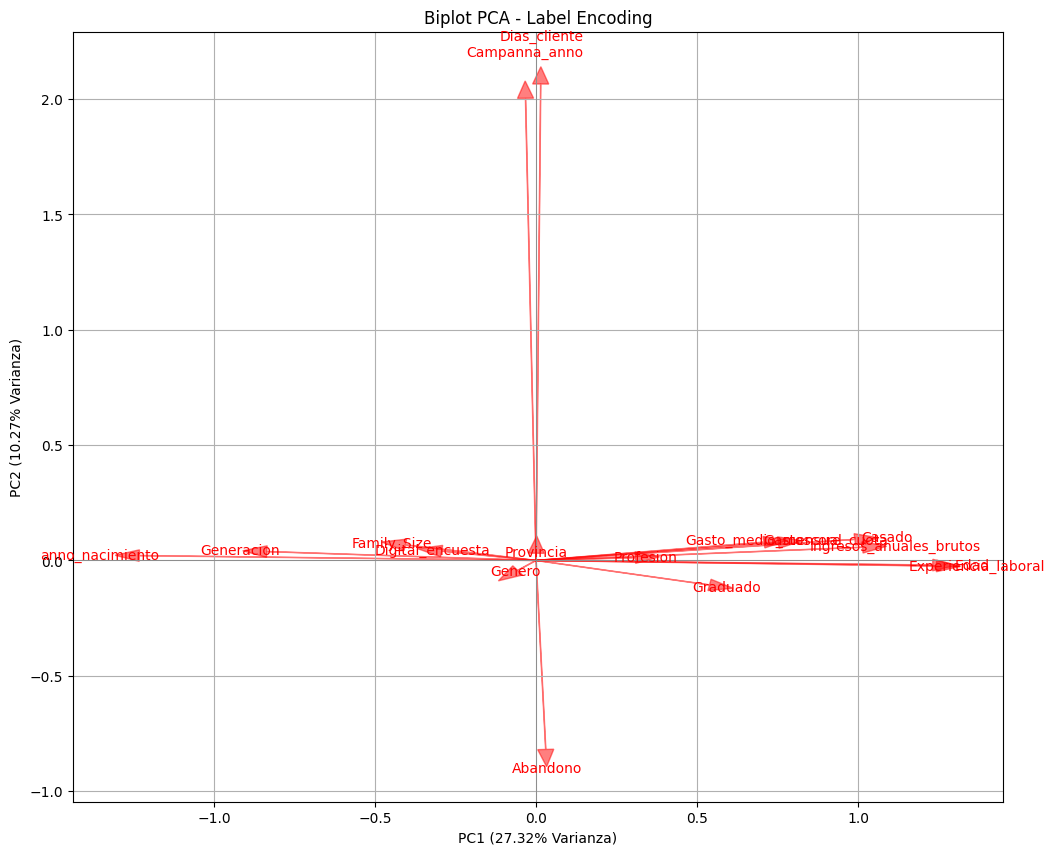


Cargas de las variables (Label Encoding):
                                PC1       PC2
Genero                    -0.019063 -0.014397
Casado                     0.330044  0.030453
Edad                       0.410652 -0.006631
Graduado                   0.179576 -0.035359
Profesion                  0.102781  0.004124
Experiencia_laboral        0.414589 -0.007973
Gastoscore                 0.250806  0.025903
Family_Size               -0.135318  0.022590
anno_nacimiento           -0.410751  0.007054
Generacion                -0.278734  0.012852
Ingresos_anuales_brutos    0.338046  0.019071
Provincia                  0.000208  0.010431
Digital_encuesta          -0.097754  0.013541
Gasto_medio_mensual_cuota  0.235967  0.026416
Abandono                   0.010027 -0.273091
Dias_cliente               0.004800  0.688529
Campanna_anno             -0.010865  0.667900


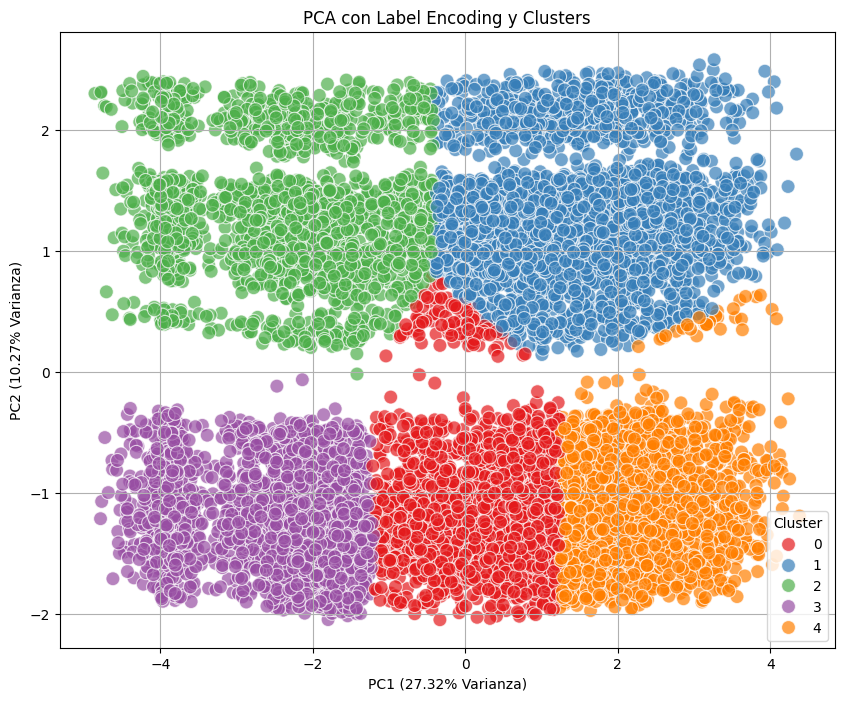

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans




# 3. Procesar Campanna_anno: rellenar NaN, redondear y convertir a entero.
df1['Campanna_anno'] = df1['Campanna_anno'].fillna(0)
df1['Campanna_anno'] = df1['Campanna_anno'].astype(float).round().astype(int)



# 5. Convertir otras columnas a numérico
numeric_cols = ['Edad', 'Family_Size', 'anno_nacimiento', 
                'Ingresos_anuales_brutos', 'Digital_encuesta', 
                'Gasto_medio_mensual_cuota', 'Dias_cliente']
for col in numeric_cols:
    if col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

# 6. Eliminar la columna ID si no se requiere
if 'ID' in df1.columns:
    df1.drop(columns=['ID'], inplace=True)

# 7. Imputar valores faltantes en el DataFrame final
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df1)

# 8. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 9. Aplicar PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Mostrar varianza explicada
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# 10. Scatter plot del PCA
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA con Label Encoding')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

# 11. Biplot: Visualizar vectores de variables originales
continuous_cols = df1.columns.tolist()
cargas = pca.components_.T
escalamiento = 3
cargas_scaled = cargas * escalamiento

plt.figure(figsize=(12,10))
for i, var in enumerate(continuous_cols):
    plt.arrow(0, 0, cargas_scaled[i,0], cargas_scaled[i,1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(cargas_scaled[i,0]*1.1, cargas_scaled[i,1]*1.1, var, 
             color='r', ha='center', va='center')
plt.title('Biplot PCA - Label Encoding')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

# 12. Mostrar cargas en un DataFrame
cargas_df = pd.DataFrame(cargas, index=continuous_cols, columns=['PC1', 'PC2'])
print("\nCargas de las variables (Label Encoding):")
print(cargas_df)

# 13. Clustering con K-Means sobre PCA
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA con Label Encoding y Clusters')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df1 = pd.read_json('data.json')
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Assume your DataFrame "df" is already loaded.
# For example: df = pd.read_csv("your_file.csv")

# Select numeric columns (only those already in numeric format)
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()

# Identify binary and continuous variables among numeric columns
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df1[col].dropna().unique()
    if set(unique_values).issubset({0, 1}):
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

# Exclude identifier columns (e.g. "ID")
id_cols = ['ID']
continuous_cols = [col for col in continuous_cols if col not in id_cols]

print(f"\nContinuous variables selected for PCA: {continuous_cols}")
print(f"Binary variables detected: {binary_cols}")

# Prepare continuous data: drop rows with missing values
df_continuous = df1[continuous_cols].dropna()

# Standardize continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_continuous)

# For binary variables, convert them to float (without scaling)
df_binary = df1[binary_cols].astype(float) if binary_cols else None

# Concatenate scaled continuous data and binary columns
if df_binary is not None:
    # Note: Make sure to align rows if needed. Here we assume no missing values for binary cols.
    X_final = np.hstack((X_scaled, df_binary.values))
    feature_names = continuous_cols + binary_cols
else:
    X_final = X_scaled
    feature_names = continuous_cols

# Apply PCA with 2 components
n_components = 2  # Adjust as needed
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_final)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Get explained variance ratio
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}% of explained variance")

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA - 2D Representation')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()

# Biplot: plot vectors (loadings) of the original variables
cargas = pca.components_.T
scaling_factor = 3  # Adjust scaling factor as needed
cargas_scaled = cargas * scaling_factor

plt.figure(figsize=(12, 10))
# Make sure we use as many variable names as the number of features in X_final
features_for_plot = feature_names[:cargas_scaled.shape[0]]
for i, var in enumerate(features_for_plot):
    plt.arrow(0, 0, cargas_scaled[i, 0], cargas_scaled[i, 1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(cargas_scaled[i, 0]*1.1, cargas_scaled[i, 1]*1.1, 
             var, color='r', ha='center', va='center')

plt.title('PCA with Original Variable Vectors')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Variance)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

# Create a DataFrame with the loadings
cargas_df = pd.DataFrame(cargas, index=feature_names, columns=['PC1', 'PC2'])
print("\nVariable loadings on principal components:")
print(cargas_df)

# Bar plots for loadings in PC1 and PC2
for pc in ['PC1', 'PC2']:
    plt.figure(figsize=(10, 8))
    plt.barh(cargas_df.index, cargas_df[pc],
             color='skyblue' if pc == 'PC1' else 'lightgreen')
    plt.xlabel(f'Loadings on {pc}')
    plt.title(f'Variable Loadings on {pc}')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Clustering with K-Means on the PCA output
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = clusters

# Scatter plot showing clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA with K-Means Clusters')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()


Continuous variables selected for PCA: ['Edad', 'Family_Size', 'anno_nacimiento', 'Ingresos_anuales_brutos', 'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Dias_cliente', 'Campanna_anno']
Binary variables detected: ['Abandono']


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5099 and the array at index 1 has size 10806